# Exploratory Data Analysis

## Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns 
import matplotlib.pyplot as plt 


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter for PT Data Analyst Roles

In [2]:
#Only get data analyst jobs in Portugal
pt_da_jobs = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Portugal')].copy()

In [3]:
#Filter by job location
pt_da_jobs['job_location'].value_counts().head(10).to_frame()

,count
job_location,
"Lisbon, Portugal",1995
"Porto, Portugal",727
Portugal,245
Anywhere,165
"Amadora, Portugal",120
"Aveiro, Portugal",71
"Braga, Portugal",64
"Rio de Mouro, Portugal",52
"Barreiro, Portugal",42


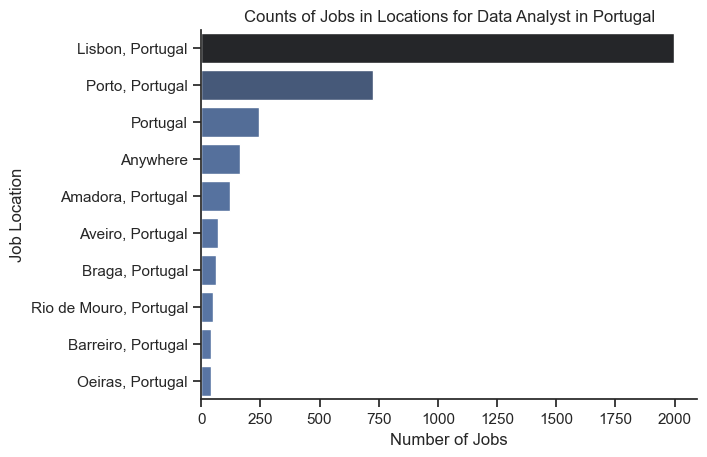

In [4]:
#Plotting job counts vs location
df_plot = pt_da_jobs['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine() #Removes border
plt.title('Counts of Jobs in Locations for Data Analyst in Portugal')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.show()

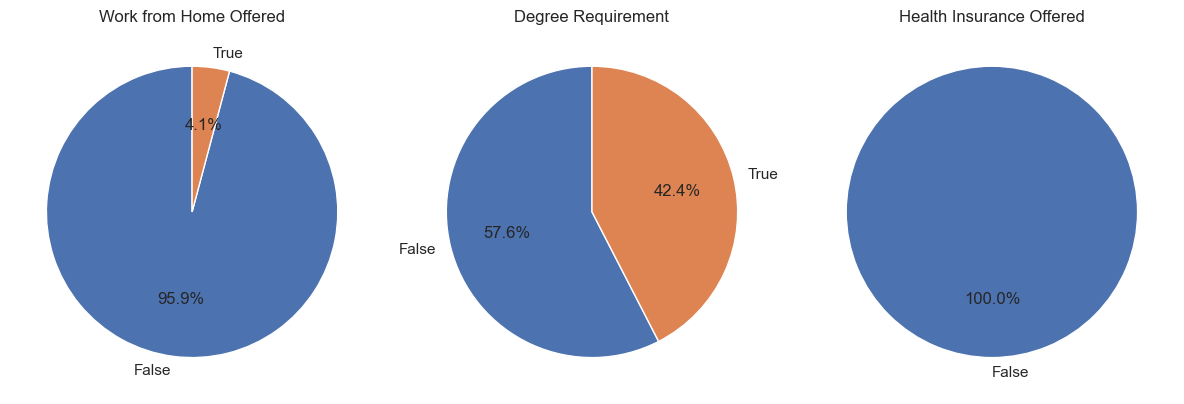

In [5]:
#Plotting percentages of three boolean-based columns
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = pt_da_jobs[column].value_counts()
    labels = counts.index.astype(str)  # Convert True/False to 'True'/'False', workaround due to pie no3 only having one type of value (False values) the labels were previously "labels=['False', 'True']"
    ax[i].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

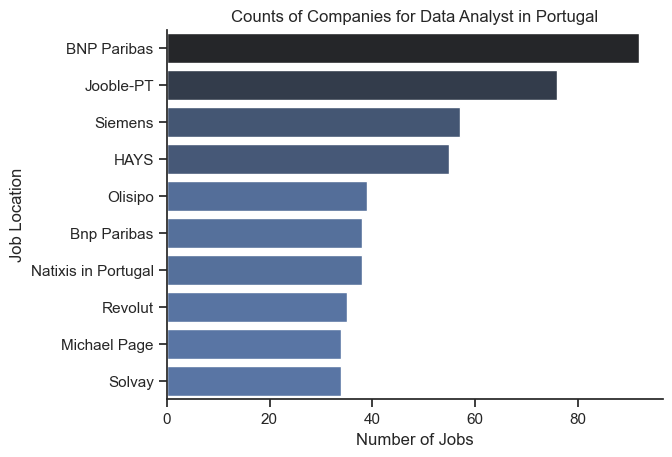

In [6]:
#Plotting job counts vs location
df_plot = pt_da_jobs['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine() #Removes border
plt.title('Counts of Companies for Data Analyst in Portugal')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.show()